In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
# find a slope of price line 
def indSlope(series,n):
    
    array_sl = [j*0 for j in range(n-1)]
    
    for j in range(n,len(series)+1):
        y = series[j-n:j]
        x = np.array(range(n))
        x_sc = (x - x.min())/(x.max() - x.min())
        y_sc = (y - y.min())/(y.max() - y.min())
        x_sc = sm.add_constant(x_sc)
        model = sm.OLS(y_sc,x_sc)
        results = model.fit()
        array_sl.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(array_sl))))
    return np.array(slope_angle)

In [3]:
# True Range and Average True Range indicator

def indATR(source_DF,n):
    df = source_DF.copy()
    df['H-L']=abs(df['high']-df['low'])
    df['H-PC']=abs(df['high']-df['close'].shift(1))
    df['L-PC']=abs(df['low']-df['close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    df['ATR'] = df['TR'].rolling(n).mean()
    df_temp = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df_temp

In [4]:
# generate data frame with all needed data

def PrepareDF(DF):
    ohlc = DF.iloc[:,[0,1,2,3,4,5]]
    ohlc.columns = ["date","open","high","low","close","volume"]
    ohlc=ohlc.set_index('date')
    df = indATR(ohlc,14).reset_index()
    df['slope'] = indSlope(df['close'],5)
    df['channel_max'] = df['high'].rolling(10).max()
    df['channel_min'] = df['low'].rolling(10).min()
    df['position_in_channel'] = (df['close']-df['channel_min']) / (df['channel_max']-df['channel_min'])
    df = df.set_index('date')
    df = df.reset_index()
    return(df)

In [5]:
# find local mimimum / local maximum

def isLCC(DF,i):
    df=DF.copy()
    LCC=0
    
    if df['close'][i]<=df['close'][i+1] and df['close'][i]<=df['close'][i-1] and df['close'][i+1]>df['close'][i-1]:
        #found the bottom
        LCC = i-1;
    return LCC

def isHCC(DF,i):
    df=DF.copy()
    HCC=0
    if df['close'][i]>=df['close'][i+1] and df['close'][i]>=df['close'][i-1] and df['close'][i+1]<df['close'][i-1]:
        #found the top
        HCC = i;
    return HCC

In [6]:
def getMaxMinChannel(DF, n):
    maxx=0
    minn=DF['low'].max()
    for i in range (1,n):
        if maxx<DF['high'][len(DF)-i]:
            maxx=DF['high'][len(DF)-i]
        if minn>DF['low'][len(DF)-i]:
            minn=DF['low'][len(DF)-i]
    return(maxx,minn)

In [7]:
apiKey='C1W4EKA40AF6PWTW' 

interval_var = '5min'
symbol='ETH'

path='https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol='+symbol+'&market=CNY&interval='+interval_var+'&apikey='+apiKey+'&datatype=csv&outputsize=full'
df = pd.read_csv(path)

In [8]:
# convert time order
df=df[::-1]

In [9]:
prepared_df=PrepareDF(df)

<Axes: >

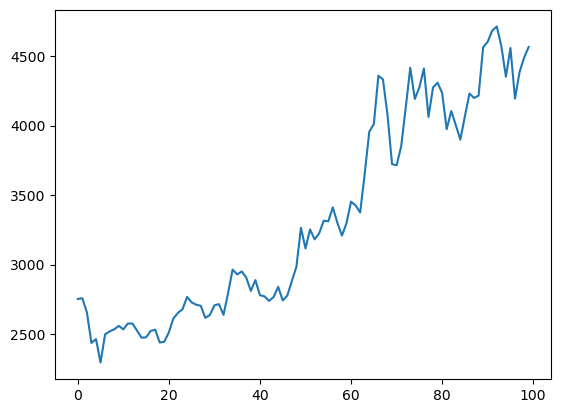

In [10]:
prepared_df[0:100]['close'].plot()

<Axes: >

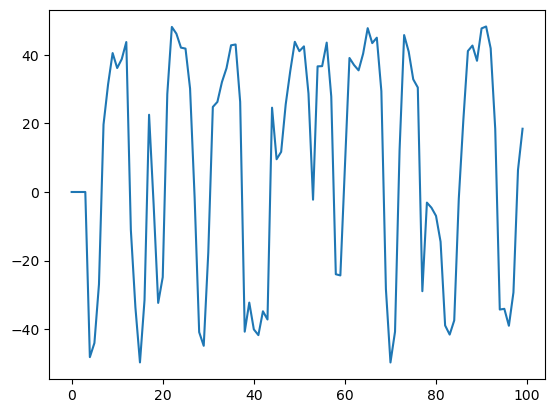

In [11]:
prepared_df[0:100]['slope'].plot()

C:\Users\Julia\AppData\Local\Temp\ipykernel_17344\2094329121.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  prepared_df[0:100][{'channel_max','channel_min','close'}].plot()


<Axes: >

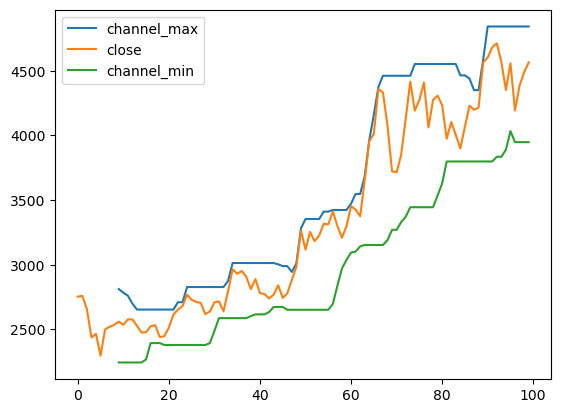

In [12]:
prepared_df[0:100][{'channel_max','channel_min','close'}].plot()

C:\Users\Julia\AppData\Local\Temp\ipykernel_17344\3846443230.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  prepared_df[0:100][{'position_in_channel'}].plot()


<Axes: >

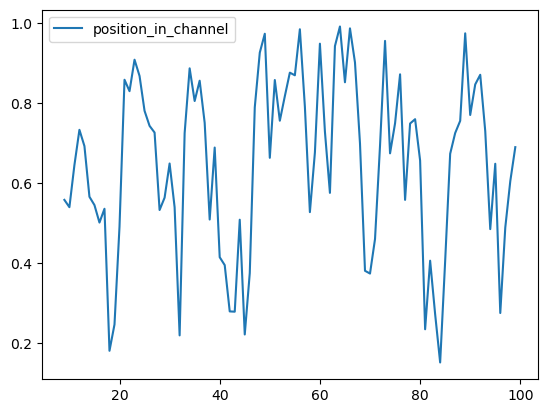

In [13]:
prepared_df[0:100][{'position_in_channel'}].plot()